In [183]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as st
from scipy.stats import levene
from scipy.stats import bootstrap, ttest_ind

In [184]:
users_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-fi-bochko/final_proj/Проект_3_users_test.csv', sep=';')
users_control_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-fi-bochko/final_proj/Проект_3_users_control_1.csv', sep=';')
users_control_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-fi-bochko/final_proj/Проект_3_users_control_2.csv', sep=';')
transactions_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-fi-bochko/final_proj/Проект_3_transactions_test.csv', sep=';')
transactions_control_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-fi-bochko/final_proj/Проект_3_transactions_control_1.csv', sep=';')
transactions_control_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-fi-bochko/final_proj/Проект_3_transactions_control_2.csv', sep=';')

#  Предварительная подготовка данных 

In [185]:
# типы данных
users_test.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [186]:

users_control_1.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [187]:

users_control_2.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [188]:
# Смотрим на пропуски
users_test.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [189]:

users_control_1.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [190]:
# Меняю пустые значения на нули для удобства

users_test['coins'].fillna(0, inplace=True)
users_control_1['coins'].fillna(0, inplace=True)
users_control_2['coins'].fillna(0, inplace=True)

users_test['visit_days'].fillna(0, inplace=True)
users_control_1['visit_days'].fillna(0, inplace=True)
users_control_2['visit_days'].fillna(0, inplace=True)

users_test['was_premium'].fillna(0, inplace=True)
users_control_1['was_premium'].fillna(0, inplace=True)
users_control_2['was_premium'].fillna(0, inplace=True)

users_test['is_premium'].fillna(0, inplace=True)
users_control_1['is_premium'].fillna(0, inplace=True)
users_control_2['is_premium'].fillna(0, inplace=True)







In [191]:
transactions_test.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

In [192]:
transactions_control_2.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

In [193]:
transactions_control_1.isna().sum()

uid             630
country         630
joined_at         0
paid_at           0
revenue         630
payment_id      630
from_page       630
product_type    630
dtype: int64

In [194]:
# тут куча пустых строк, удалим их
transactions_control_1 = transactions_control_1.dropna()
transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
372,891556971.0,France,2017-01-11 05:07:00,2017-01-11 05:16:00,2886.0,68.0,none,premium_no_trial
373,892052106.0,Spain,2017-10-22 01:38:00,2017-10-29 03:44:00,12883.0,147.0,trial_vip_popup,trial_premium
374,892145004.0,Chile,2017-10-20 04:25:00,2017-01-11 02:56:00,9919.0,147.0,trial_vip_popup,trial_premium
375,891458229.0,Spain,2017-03-11 12:12:00,2017-04-11 03:43:00,6305.0,19.0,menu,coins


In [195]:
# теперь сичтаю дубликаты, сразу удаляю где они есть

users_test.duplicated().sum()

0

In [196]:


users_control_1.duplicated().sum()

0

In [197]:

users_control_2.duplicated().sum()

0

In [198]:


transactions_test.duplicated().sum()


7

In [199]:
transactions_test = transactions_test.drop_duplicates()

In [200]:


transactions_control_1.duplicated().sum()


21

In [201]:
transactions_control_1 = transactions_control_1.drop_duplicates()

In [202]:


transactions_control_2.duplicated().sum()

5

In [203]:
transactions_control_2 = transactions_control_2.drop_duplicates()

In [204]:

# Переводим колонки с датой в формат даты


transactions_test['joined_at'] = pd.to_datetime(transactions_test['joined_at'])
transactions_test['paid_at'] = pd.to_datetime(transactions_test['paid_at'])

transactions_control_1['joined_at'] = pd.to_datetime(transactions_control_1['joined_at'])
transactions_control_1['paid_at'] = pd.to_datetime(transactions_control_1['paid_at'])

transactions_control_2['joined_at'] = pd.to_datetime(transactions_control_2['joined_at'])
transactions_control_2['paid_at'] = pd.to_datetime(transactions_control_2['paid_at'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [205]:
transactions_test['sub_days'] = (transactions_test['paid_at'] - transactions_test['joined_at']).dt.days
transactions_control_1['sub_days'] = (transactions_control_1['paid_at'] - transactions_control_1['joined_at']).dt.days
transactions_control_2['sub_days'] = (transactions_control_2['paid_at'] - transactions_control_2['joined_at']).dt.days





/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [206]:
# Много пользователей зарегистрировавшихся после первой покупки, значит либо приложением можно пользоваться без регистрации,
# либо ошибка в данных
transactions_test.sort_values('sub_days')


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,sub_days
184,891861594,Chile,2017-10-26 02:25:00,2017-01-11 04:37:00,4004,19,empty_likes,coins,-288
245,891861048,Canada,2017-10-26 02:55:00,2017-01-11 07:13:00,3523,19,none,coins,-288
183,891872313,Switzerland,2017-10-25 21:35:00,2017-01-11 23:36:00,9451,147,trial_vip_popup,trial_premium,-287
260,892018248,United Kingdom (Great Britain),2017-10-22 19:50:00,2017-01-11 13:42:00,6032,19,likes,coins,-285
200,891589239,Italy,2017-10-31 14:16:00,2017-02-11 11:45:00,6305,19,autorefill,coins,-263
...,...,...,...,...,...,...,...,...,...
43,891558921,United States of America,2017-01-11 03:07:00,2017-10-11 09:08:00,897,146,menu,coins,273
251,891499695,United States of America,2017-02-11 14:14:00,2017-11-11 20:13:00,9698,147,dating,premium_no_trial,273
230,891508155,Latvia,2017-02-11 09:46:00,2017-11-11 20:38:00,6357,147,promo_09,premium_no_trial,273
6,891558921,United States of America,2017-01-11 03:07:00,2017-10-11 09:05:00,9100,147,left_sidebar_menu,premium_no_trial,273


In [207]:
transactions_control_1.sort_values('sub_days')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,sub_days
66,891822480.0,Italy,2017-10-26 22:27:00,2017-01-11 16:50:00,1898.0,19.0,none,coins,-289
87,891881343.0,United States of America,2017-10-25 17:58:00,2017-01-11 21:08:00,12727.0,147.0,dating,trial_premium,-287
254,891908385.0,Argentina,2017-10-25 02:33:00,2017-01-11 04:34:00,10686.0,147.0,trial_vip_popup,trial_premium,-287
374,892145004.0,Chile,2017-10-20 04:25:00,2017-01-11 02:56:00,9919.0,147.0,trial_vip_popup,trial_premium,-283
124,892136748.0,France,2017-10-20 10:32:00,2017-01-11 04:10:00,2834.0,19.0,none,coins,-283
...,...,...,...,...,...,...,...,...,...
177,891452706.0,Italy,2017-03-11 14:48:00,2017-11-11 17:21:00,6305.0,19.0,gifts,coins,245
250,891529926.0,United States of America,2017-01-11 19:54:00,2017-11-14 12:52:00,9087.0,147.0,trial_vip_popup,trial_premium,306
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type,695
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type,695


In [208]:
transactions_control_2.sort_values('sub_days').head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,sub_days
20,891609360,Italy,2017-10-31 02:07:00,2017-01-11 23:19:00,3913,146,empty_likes,coins,-293
174,891664350,Germany,2017-10-30 00:21:00,2017-01-11 22:36:00,6279,147,left_sidebar_menu,premium_no_trial,-292
49,891664350,Germany,2017-10-30 00:21:00,2017-01-11 22:36:00,2327,67,empty_mutual,other_type,-292
129,891937068,Portugal,2017-10-24 14:22:00,2017-01-11 05:34:00,2015,19,none,coins,-287
292,891637005,Spain,2017-10-30 15:22:00,2017-02-11 13:38:00,6292,147,left_sidebar_menu,premium_no_trial,-262


In [209]:
# Судя по тому, что нет пользователей по фильтру " раньше не было подписки, сейчас есть подписка", можно сделать вывод,
# что все подписывались повторно, либо is_premium = 1 автоматически означает was_premium = 1, либо в данных ошибка
# не будем рассматривать эти столбцы
new_users_test = users_test.query('was_premium !=1 and is_premium == 1')
new_users_test

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue


In [210]:
# то же самое в контрольных группах
users_control_1.query('was_premium !=1 and is_premium == 1')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue


In [211]:
users_control_2.query('was_premium !=1 and is_premium == 1')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue


In [212]:
# проверяю количество пользователей
pd.DataFrame({'t': [users_test.uid.nunique()],
              'c_1': [users_control_1.uid.nunique()],
              'c_2': [users_control_2.uid.nunique()]})

,t,c_1,c_2
0,4308,4340,4264


In [213]:
# проверю, совпадает ли общая выручка в users и transactions

merged_test = pd.merge(transactions_test.groupby('uid', as_index=False).agg({'revenue':'sum'}), users_test[['uid', 'total_revenue']], on='uid')
merged_c1 = pd.merge(transactions_control_1. \
                     groupby('uid', as_index=False).agg({'revenue':'sum'}), users_control_1[['uid', 'total_revenue']], on='uid')
merged_c2 = pd.merge(transactions_control_2. \
                     groupby('uid', as_index=False).agg({'revenue':'sum'}), users_control_2[['uid', 'total_revenue']], on='uid')


In [214]:
merged_test.query('revenue != total_revenue')

,uid,revenue,total_revenue
42,891508155,9165,10101
99,892050108,15119,16380
117,892202526,1794,2691
124,892236423,86996,95823
129,892275462,58968,14885
131,892339626,17004,17758


In [215]:
merged_c1.query('revenue != total_revenue')

,uid,revenue,total_revenue
16,891252072.0,7553.0,8814
35,891320916.0,10075.0,13858
44,891365490.0,8814.0,10075
46,891367521.0,16081.0,20462
54,891452706.0,12597.0,18902
95,891721851.0,17277.0,18174
97,891739737.0,20163.0,21424
140,892102893.0,12610.0,25220
161,892207959.0,16380.0,18902
178,892333905.0,403104.0,486330


In [216]:
# во всех таблицах есть завышенная выручка в users, судя по всему из-за дубликатов в транзакциях

merged_c2.query('revenue != total_revenue')

,uid,revenue,total_revenue
97,891862596,8814,10075
122,892009254,4719,7072
128,892045743,8814,10075
132,892062660,1261,2522
133,892064328,12597,18902


In [217]:
# заменю эти значения на сумму revenue 

users_test = pd.merge(users_test, merged_test[['uid', 'revenue']], how='left', on="uid")
users_control_1 = pd.merge(users_control_1, merged_c1[['uid', 'revenue']], how='left', on="uid")
users_control_2 = pd.merge(users_control_2, merged_c2[['uid', 'revenue']], how='left', on="uid")




In [218]:
users_test['total_revenue'] = users_test['revenue'].fillna(users_test['total_revenue'])
users_control_1['total_revenue'] = users_control_1['revenue'].fillna(users_control_1['total_revenue'])
users_control_2['total_revenue'] = users_control_2['revenue'].fillna(users_control_2['total_revenue'])

users_test = users_test.drop('revenue', axis=1)
users_control_1 = users_control_1.drop('revenue', axis=1)
users_control_2 = users_control_2.drop('revenue', axis=1)

Итог проверки: 
1. Во всех таблицах транзакций есть дубликаты, из-за них есть ошибки в выручке в users
2. is_premium = 1 автоматически означает was_premium = 1 в таблицах users, поэтому эту колонку далее не учитываем
3. много пользователей с первой транакцией раньше даты регистрации в таблицах users
4. Пустые строки в первой контрольной группе

# В условии сказано: для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. Для начала попробую понять, для каких стран когда была изменена стоимость

In [219]:
transactions_test.product_type.unique()

array(['trial_premium', 'other_type', 'premium_no_trial', 'coins'],
      dtype=object)

In [220]:
# создаю колонки с датой первой транзакции, месяцом первой транзакции и минимальным платежом у каждого пользователся
#
#

transactions_test['first_transaction_date'] = transactions_test.groupby('uid')['paid_at'].transform('min')
transactions_test['month'] = transactions_test['first_transaction_date'].dt.to_period('M')

transactions_test['min_revenue'] = transactions_test.groupby('uid')['revenue'].transform('min')
transactions_test

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,sub_days,first_transaction_date,month,min_revenue
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium,186,2017-11-13 15:04:00,2017-11,12909
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium,8,2017-10-30 01:37:00,2017-10,13923
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type,4,2017-10-18 01:15:00,2017-10,1261
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type,9,2017-10-18 01:15:00,2017-10,1261
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium,8,2017-10-27 19:10:00,2017-10,6305
...,...,...,...,...,...,...,...,...,...,...,...,...
268,891419625,Israel,2017-04-11 05:58:00,2017-11-11 08:33:00,14352,147,trial_vip_popup,trial_premium,214,2017-11-11 08:33:00,2017-11,14352
269,891447105,United Kingdom (Great Britain),2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,fans,premium_no_trial,244,2017-03-11 17:18:00,2017-03,3562
270,891497073,United States of America,2017-02-11 15:33:00,2017-05-11 04:06:00,2730,67,empty_likes,other_type,88,2017-05-11 04:06:00,2017-05,2730
271,891406224,Israel,2017-04-11 12:56:00,2017-04-11 13:35:00,2743,67,empty_likes,other_type,0,2017-04-11 13:35:00,2017-04,2743


In [221]:
# единственным вариантом определить новых пользователей вижу оставить первую транзакцию у пользователей с премиумом 
# Если payment_id это платформа, то их всего две для транзакий premium_no_trial
new_test = transactions_test \
.query('product_type == "premium_no_trial"') \
.groupby(['country', 'payment_id', 'month'], as_index=False).agg(median_rev_t=('revenue', 'median'), transaction_count=('paid_at', 'count')) \
.sort_values('month')
new_test


,country,payment_id,month,median_rev_t,transaction_count
9,Chile,147,2017-01,8125.0,1
36,United Kingdom (Great Britain),147,2017-01,9542.0,1
6,Canada,68,2017-01,3588.0,2
24,Latvia,147,2017-02,6357.0,1
41,United States of America,147,2017-02,12597.0,1
20,Italy,147,2017-02,12597.0,1
18,Italy,68,2017-02,1898.0,1
26,Spain,147,2017-02,5408.0,1
7,Canada,147,2017-03,12597.0,1
37,United Kingdom (Great Britain),147,2017-03,7319.0,1


In [222]:
# считаю средний размер первой транзакции и их количство по месяцам

plot_test = new_test.groupby('month', as_index=False).agg({'median_rev_t': 'mean', 'transaction_count': 'sum'})
plot_test

,month,median_rev_t,transaction_count
0,2017-01,7085.000000,4
1,2017-02,7771.400000,5
2,2017-03,10837.666667,3
3,2017-04,9457.500000,6
4,2017-05,7219.333333,8
5,2017-06,5040.750000,3
6,2017-07,5174.000000,2
7,2017-08,7098.000000,4
8,2017-09,113477.000000,1
9,2017-10,7879.733333,37


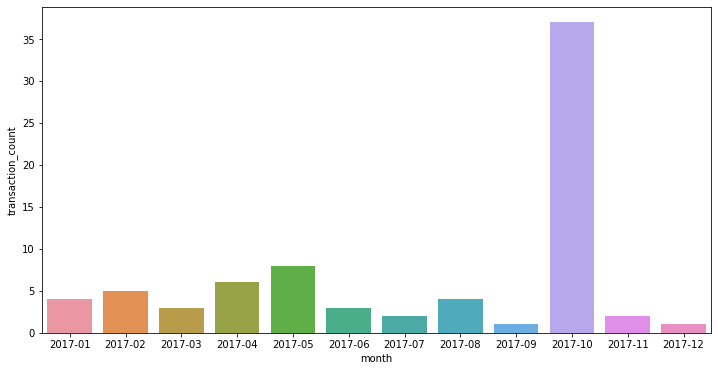

In [223]:
#  в октябре очевидно количество увеличилось

plt.figure(figsize=(12, 6))
sns.barplot(x = 'month', y = 'transaction_count', data=plot_test)

In [224]:
# то же самое делаю для контрольных групп

transactions_control_1['first_transaction_date'] = transactions_control_1.groupby('uid')['paid_at'].transform('min')
transactions_control_1['month'] = transactions_control_1['first_transaction_date'].dt.to_period('M')

new_control_1 = transactions_control_1 \
.query('product_type == "premium_no_trial"') \
.groupby(['country', 'payment_id', 'month'], as_index=False).agg(median_rev_c1=('revenue', 'median'), transaction_count=('paid_at', 'count')) \
.sort_values('month')
new_control_1

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,country,payment_id,month,median_rev_c1,transaction_count
29,Italy,68.0,2017-01,1898.0,1
32,Italy,147.0,2017-01,6292.0,1
52,United States of America,147.0,2017-01,6292.0,1
16,France,147.0,2017-01,6292.0,1
13,France,68.0,2017-01,2886.0,1
...,...,...,...,...,...
27,Israel,147.0,2017-10,5525.0,5
44,Turkey,147.0,2017-10,3614.0,1
41,Spain,147.0,2017-11,6324.5,2
28,Israel,147.0,2017-11,6292.0,1


In [225]:
plot_control_1 = new_control_1.groupby('month', as_index=False).agg({'median_rev_c1': 'mean', 'transaction_count': 'sum'})
plot_control_1

,month,median_rev_c1,transaction_count
0,2017-01,4732.000000,5
1,2017-02,16701.750000,4
2,2017-03,6344.000000,3
3,2017-04,14219.833333,6
4,2017-05,4853.333333,9
5,2017-06,5538.928571,9
6,2017-07,5616.000000,4
7,2017-08,5638.750000,7
8,2017-09,6292.000000,5
9,2017-10,5033.676471,49


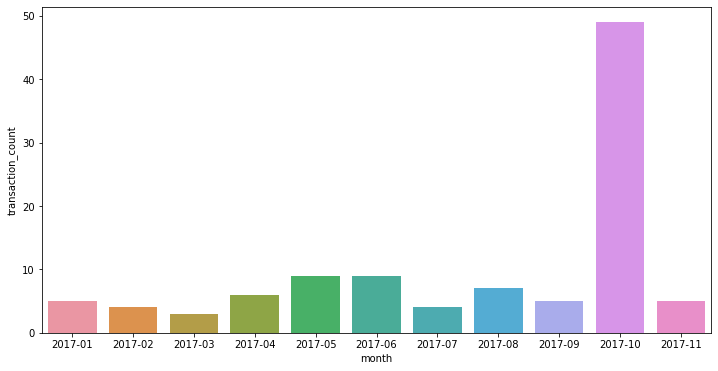

In [226]:
# в обеих контррольных группах тоже наблюдается рост количества покупок премиума в октябре


plt.figure(figsize=(12, 6))
sns.barplot(x = 'month', y = 'transaction_count', data=plot_control_1)

In [227]:
transactions_control_2['first_transaction_date'] = transactions_control_2.groupby('uid')['paid_at'].transform('min')
transactions_control_2['month'] = transactions_control_2['first_transaction_date'].dt.to_period('M')
new_control_2 = transactions_control_2 \
.query('product_type == "premium_no_trial"') \
.groupby(['country', 'payment_id', 'month'], as_index=False).agg(median_rev_c2=('revenue', 'median'), transaction_count=('paid_at', 'count'))
new_control_2

,country,payment_id,month,median_rev_c2,transaction_count
0,Argentina,68,2017-11,10413.0,2
1,Argentina,147,2017-07,5785.0,2
2,Argentina,147,2017-10,5778.5,2
3,Argentina,147,2017-11,6292.0,1
4,Australia,0,2017-07,4719.0,1
5,Australia,147,2017-07,4719.0,1
6,Austria,68,2017-06,4056.0,1
7,Belgium,68,2017-05,10608.0,1
8,Belgium,68,2017-08,3042.0,1
9,Belgium,147,2017-10,6292.0,3


In [228]:
plot_control_2 = new_control_2.groupby('month', as_index=False).agg({'median_rev_c2': 'median', 'transaction_count': 'sum'})
plot_control_2

,month,median_rev_c2,transaction_count
0,2017-01,4147.0,2
1,2017-02,6292.0,6
2,2017-03,6292.0,4
3,2017-04,6292.0,7
4,2017-05,6435.0,6
5,2017-06,6292.0,8
6,2017-07,4719.0,6
7,2017-08,3692.0,3
8,2017-09,6292.0,1
9,2017-10,6292.0,58


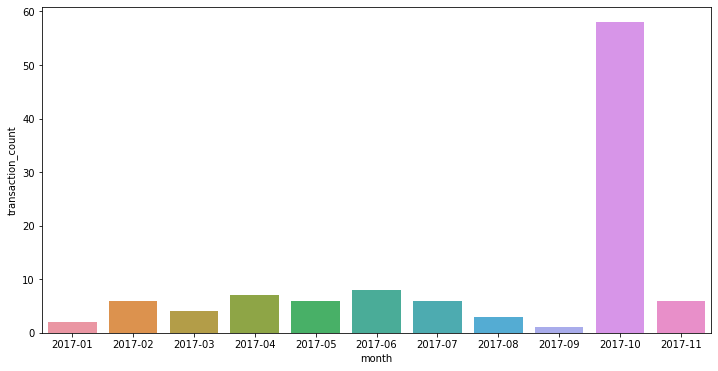

In [229]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'month', y = 'transaction_count', data=plot_control_2)

In [230]:
# объединю три таблицы чтобы проверить разницу транзакций в каждый месяц

merged_transactions = \
pd.merge(pd.merge(new_test, new_control_1, on=['country', 'payment_id', 'month']), \
         new_control_2, on=['country', 'payment_id', 'month'])
merged_transactions

,country,payment_id,month,median_rev_t,transaction_count_x,median_rev_c1,transaction_count_y,median_rev_c2,transaction_count
0,United States of America,147,2017-02,12597.0,1,47723.0,1,4634.5,2
1,United States of America,147,2017-05,4719.0,1,6292.0,2,4199.0,2
2,United States of America,147,2017-07,6292.0,1,6292.0,1,6292.0,1
3,United Kingdom (Great Britain),147,2017-10,5954.0,2,7332.0,1,5161.0,6
4,United States of America,68,2017-10,11362.0,2,2444.0,3,2756.0,1
5,Italy,147,2017-10,10224.5,2,6539.0,3,6415.5,2
6,Spain,147,2017-10,6292.0,3,7202.0,2,6331.0,6
7,United States of America,147,2017-10,9100.0,10,4537.0,13,5265.0,17
8,Israel,147,2017-10,12597.0,1,5525.0,5,6292.0,2
9,Germany,147,2017-10,6279.0,1,4946.5,2,7111.0,2


In [231]:
# создаю колонки с разницей средней суммы транзации в тестовой и контрольных группах


merged_transactions['difference_1'] = merged_transactions['median_rev_t'] - merged_transactions['median_rev_c1'] 
merged_transactions['difference_2'] = merged_transactions['median_rev_t'] - merged_transactions['median_rev_c2'] 
merged_transactions

,country,payment_id,month,median_rev_t,transaction_count_x,median_rev_c1,transaction_count_y,median_rev_c2,transaction_count,difference_1,difference_2
0,United States of America,147,2017-02,12597.0,1,47723.0,1,4634.5,2,-35126.0,7962.5
1,United States of America,147,2017-05,4719.0,1,6292.0,2,4199.0,2,-1573.0,520.0
2,United States of America,147,2017-07,6292.0,1,6292.0,1,6292.0,1,0.0,0.0
3,United Kingdom (Great Britain),147,2017-10,5954.0,2,7332.0,1,5161.0,6,-1378.0,793.0
4,United States of America,68,2017-10,11362.0,2,2444.0,3,2756.0,1,8918.0,8606.0
5,Italy,147,2017-10,10224.5,2,6539.0,3,6415.5,2,3685.5,3809.0
6,Spain,147,2017-10,6292.0,3,7202.0,2,6331.0,6,-910.0,-39.0
7,United States of America,147,2017-10,9100.0,10,4537.0,13,5265.0,17,4563.0,3835.0
8,Israel,147,2017-10,12597.0,1,5525.0,5,6292.0,2,7072.0,6305.0
9,Germany,147,2017-10,6279.0,1,4946.5,2,7111.0,2,1332.5,-832.0


In [232]:
# разница с тестовой и первой контрольной группой

pd.pivot_table(merged_transactions, index=[ "month"], columns=["country"], values=["difference_1"])

difference_1                                        \
country    Argentina France Germany  Israel   Italy  Spain   
month                                                        
2017-02          NaN    NaN     NaN     NaN     NaN    NaN   
2017-05          NaN    NaN     NaN     NaN     NaN    NaN   
2017-07          NaN    NaN     NaN     NaN     NaN    NaN   
2017-10       3178.5 -188.5  1332.5  7072.0  3685.5 -910.0   
2017-11          NaN    NaN     NaN     NaN     NaN    NaN   

                                                                 
country United Kingdom (Great Britain) United States of America  
month                                                            
2017-02                            NaN                 -35126.0  
2017-05                            NaN                  -1573.0  
2017-07                            NaN                      0.0  
2017-10                        -1378.0                   6740.5  
2017-11                            NaN                   3406.0

In [233]:
# разница со второй контрольной группой

pd.pivot_table(merged_transactions, index=[ "month"], columns=["country"], values=["difference_2"])

difference_2                                       \
country    Argentina France Germany  Israel   Italy Spain   
month                                                       
2017-02          NaN    NaN     NaN     NaN     NaN   NaN   
2017-05          NaN    NaN     NaN     NaN     NaN   NaN   
2017-07          NaN    NaN     NaN     NaN     NaN   NaN   
2017-10       3185.0  -84.5  -832.0  6305.0  3809.0 -39.0   
2017-11          NaN    NaN     NaN     NaN     NaN   NaN   

                                                                 
country United Kingdom (Great Britain) United States of America  
month                                                            
2017-02                            NaN                   7962.5  
2017-05                            NaN                    520.0  
2017-07                            NaN                      0.0  
2017-10                          793.0                   6220.5  
2017-11                            NaN                   5018.0

In [234]:
#временные интервалы у всех групп примерно одинаковые

print(transactions_control_1.first_transaction_date.min())
print(transactions_control_1.first_transaction_date.max())

print(transactions_control_2.first_transaction_date.min())
print(transactions_control_2.first_transaction_date.max())

print(transactions_test.first_transaction_date.min())
print(transactions_test.first_transaction_date.max())

2016-12-14 16:16:00
2017-12-11 18:21:00
2017-01-11 05:34:00
2017-12-11 23:28:00
2017-01-11 04:37:00
2017-12-11 21:20:00


# Из таблицы можно предположить, что в октябре цену повысили почти для некоторых развитых стран

# Проверю, можно ли объединить контрольные группы в одну

In [235]:


users_control_1.total_revenue.describe()

count      4340.000000
mean        574.839631
std        6835.031289
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      403104.000000
Name: total_revenue, dtype: float64

In [236]:
users_control_2.total_revenue.describe()

count     4264.000000
mean       447.466463
std       2848.244591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      81796.000000
Name: total_revenue, dtype: float64

In [237]:
users_control_1.age.describe()

count    4340.000000
mean       32.095392
std        10.257466
min        16.000000
25%        24.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

In [238]:
users_control_2.age.describe()

count    4264.000000
mean       32.046201
std        10.170721
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

In [239]:
users_test.age.describe()

count    4308.000000
mean       31.889276
std        10.245287
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

In [240]:


users_control_1.groupby('country', as_index=False).agg(count=('country', 'count')).sort_values('count', ascending=False)

,country,count
38,United States of America,1471
1,Argentina,389
13,France,370
30,Spain,342
17,Italy,338
7,Chile,287
36,United Arab Emirates,207
14,Germany,188
37,United Kingdom (Great Britain),146
6,Canada,134


In [241]:
users_control_2.groupby('country', as_index=False).agg(count=('country', 'count')).sort_values('count', ascending=False)

,country,count
43,United States of America,1486
0,Argentina,397
12,France,376
35,Spain,310
18,Italy,293
6,Chile,286
41,United Arab Emirates,211
14,Germany,202
42,United Kingdom (Great Britain),146
5,Canada,134


In [242]:
users_control_1.groupby('gender').agg({'gender': 'count'})

,gender
gender,
0,182
1,4158


In [243]:
users_control_2.groupby('gender').agg({'gender': 'count'})

,gender
gender,
0,195
1,4069


In [244]:
users_test.groupby('gender').agg({'gender': 'count'})

,gender
gender,
0,202
1,4106


In [245]:
users_control_1

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,0.0,United States of America,"1,2,3,4,5,6",0,22,32,982,0.0,0.0,0.0
1,891248523,29,500,0.0,United States of America,"1,2",1,26,32,12,0.0,0.0,0.0
2,891670932,33,800,0.0,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0.0,0.0
3,891060786,26,0,0.0,Argentina,"1,2,3,4,5",1,23,29,0,0.0,0.0,0.0
4,892006554,35,294,0.0,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,892022304,26,227,0.0,United States of America,0,0,23,29,427,0.0,0.0,0.0
4336,891905022,38,200,0.0,Argentina,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21",1,20,50,5,0.0,0.0,0.0
4337,891304722,49,411,0.0,United States of America,1,1,46,52,17,0.0,0.0,0.0
4338,891302328,27,0,0.0,United States of America,"1,3,5",1,24,30,0,0.0,0.0,0.0


In [246]:
# сравню распределение общей выручки в группах двухвыборочным критерием Колмогорова-Смирнова 
# сначала всех пользователей
# тест показывает, что выборки похожи, p почти единица


st.ks_2samp(users_control_1.total_revenue, users_control_2.total_revenue)



KstestResult(statistic=0.004703616603695282, pvalue=0.999999999805508)

In [247]:
# теперь только пользовтелей с выручкой
# тут p = 31%, тоже не статзначимые различия

c1 = users_control_1.query("total_revenue > 0")
c2 = users_control_2.query("total_revenue > 0")



st.ks_2samp(c1.total_revenue, c2.total_revenue)

KstestResult(statistic=0.09919370480175113, pvalue=0.28114213603142824)

In [248]:
users_control_1['g'] = 'с1'
users_control_2['g'] = 'с2'

con_test = pd.concat([users_control_1, users_control_2], ignore_index=True)

con_aa_test = con_test.groupby('g', as_index=False).agg({'total_revenue': 'sum', 'uid': 'count'}).reset_index()
con_aa_test['arpu'] = con_aa_test['total_revenue'] / con_aa_test['uid']
con_aa_test

,index,g,total_revenue,uid,arpu
0,0,с1,2494804.0,4340,574.839631
1,1,с2,1907997.0,4264,447.466463


In [249]:
# дисперсии примерно равны, p = 0.26, значит можно провести т-тест

levene(users_control_1.total_revenue, users_control_2.total_revenue)


LeveneResult(statistic=1.2649685680535738, pvalue=0.2607440818833437)

In [250]:
# p=0.26, статзначимых различий между выборками нет

stats.ttest_ind(users_control_1.total_revenue, users_control_2.total_revenue)

Ttest_indResult(statistic=1.1247082146288316, pvalue=0.26074408188292136)

# серьезных различий по выручке, полу и возрасту, набору стран в контрольных группах не вижу, поэтому можно объединить их в одну таблицу


# Разберемся со странами

In [251]:


users_control = pd.concat([users_control_1, users_control_2])
users_control

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,g
0,892319115,25,435,0.0,United States of America,"1,2,3,4,5,6",0,22,32,982,0.0,0.0,0.0,с1
1,891248523,29,500,0.0,United States of America,"1,2",1,26,32,12,0.0,0.0,0.0,с1
2,891670932,33,800,0.0,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0.0,0.0,с1
3,891060786,26,0,0.0,Argentina,"1,2,3,4,5",1,23,29,0,0.0,0.0,0.0,с1
4,892006554,35,294,0.0,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0.0,0.0,с1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0.0,0.0,0.0,с2
4260,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0.0,0.0,0.0,с2
4261,891096429,41,333,0.0,United States of America,0,1,38,44,6,0.0,0.0,0.0,с2
4262,891697584,48,210,0.0,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,0.0,0.0,0.0,с2


In [252]:
pd.DataFrame({'t': [users_test.country.nunique()],\
'c': [users_control.country.nunique()]})

,t,c
0,51,58


In [253]:
# оставляю страны, которые есть в обеих группах всего из 37

users_test = users_test[users_test['country'].isin(users_control['country'])]

users_control = users_control[users_control['country'].isin(users_test['country'])]


pd.DataFrame({'t': [users_test.country.nunique()],
              'c': [users_control.country.nunique()]
              })

,t,c
0,37,37


In [254]:
# создаем колонки с группой по возрасту
b = [17, 27, 39, 50, 99]  
l = ['17-26', '27-38', '39-49', '50-99']
users_test['ageGroup'] = pd.cut(users_test['age'], bins=b, labels=l, right=False)


b = [17, 27, 39, 50, 99]  
l = ['17-26', '27-38', '39-49', '50-99']
users_control['ageGroup'] = pd.cut(users_control['age'], bins=b, labels=l, right=False)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [255]:
# посмотрю на графиках среднюю выручку по странам, где были платящие пользователи

t_rev_plot = users_test.query('total_revenue > 0').groupby('country', as_index=False). \
agg({'total_revenue': 'mean', 'uid': 'count'}).sort_values('total_revenue')
t_rev_plot

,country,total_revenue,uid
9,Mexico,6214.000000,1
11,Switzerland,7418.666667,3
12,Turkey,9165.000000,1
14,United Kingdom (Great Britain),9672.000000,8
3,Canada,10577.666667,6
1,Australia,12597.000000,1
8,Italy,12602.777778,9
15,United States of America,13680.000000,52
6,Germany,13728.000000,7
2,Belgium,15671.500000,4


In [256]:
c_rev_plot = users_control.query('total_revenue > 0').groupby('country', as_index=False) \
.agg({'total_revenue': 'mean', 'uid': 'count'}).sort_values('total_revenue')
c_rev_plot

,country,total_revenue,uid
11,Russian Federation,806.000000,1
7,India,4810.000000,2
5,France,8070.780488,41
1,Australia,8190.000000,5
15,Ukraine,8879.000000,1
13,Switzerland,9110.833333,6
8,Israel,9113.650000,20
10,Portugal,9155.250000,8
3,Canada,9430.000000,13
6,Germany,9540.700000,10


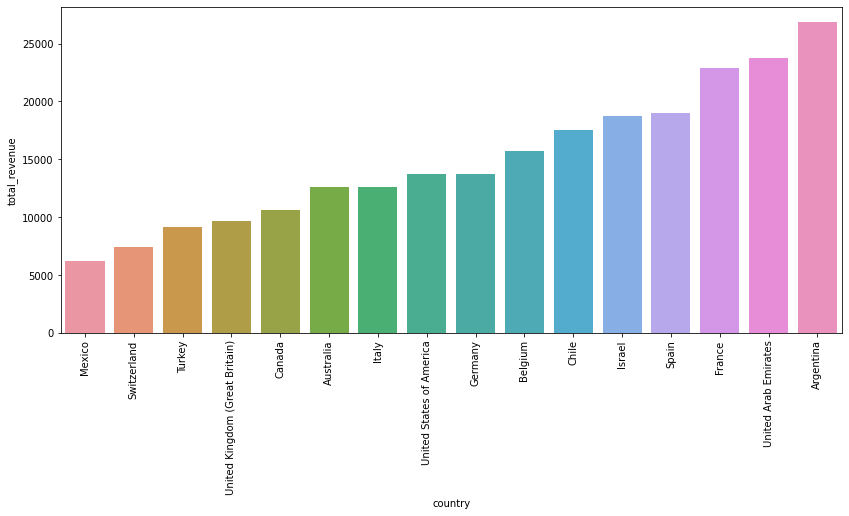

In [257]:
# средняя общая выручка в тестовой группе по странам
plt.figure(figsize = (14, 6))
plt.xticks(rotation = 90)
sns.barplot(x = t_rev_plot.country, y = t_rev_plot.total_revenue)

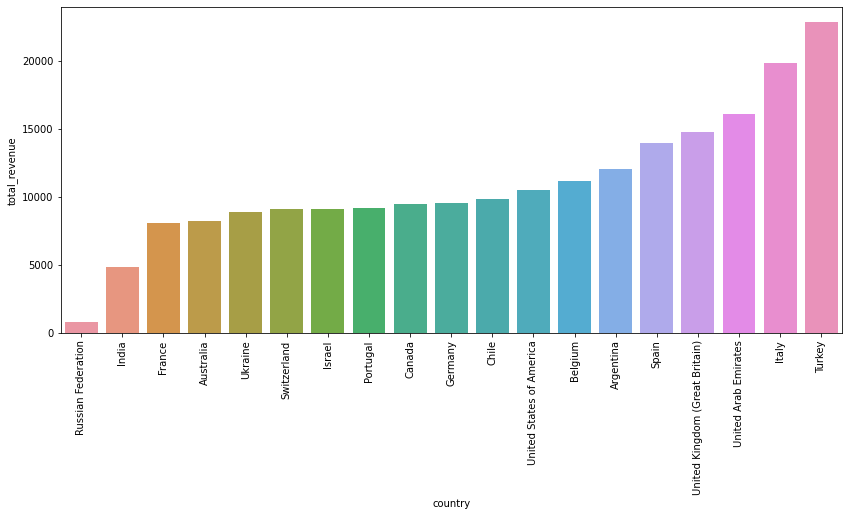

In [258]:
# средняя общая выручка в контрольной группе по странам
plt.figure(figsize = (14, 6))
plt.xticks(rotation = 90)
sns.barplot(x = c_rev_plot.country, y = c_rev_plot.total_revenue)

In [259]:
# попробую сделать маленький т-тест со средней выручкой
# роверим на нормальность
pg.normality(t_rev_plot.total_revenue)


,W,pval,normal
total_revenue,0.960616,0.672983,True


In [260]:
pg.normality(c_rev_plot.total_revenue)

,W,pval,normal
total_revenue,0.92365,0.1322,True


In [261]:
# в контрольной группе есть пользователь с огромной выручкой
users_control.groupby('uid').agg({'total_revenue': 'sum'}).sort_values('total_revenue', ascending=False)

,total_revenue
uid,
892333905,403104.0
891778551,81796.0
892307238,75647.0
892216461,64298.0
891383310,63037.0
...,...
891471108,0.0
891471105,0.0
891470889,0.0


In [262]:

transactions_control = pd.concat([transactions_control_1, transactions_control_2])

In [263]:
# у этого пользователя каждая транакция больше средней выручки по стране и продукт coins, удалим его
transactions_control.query('uid == 892333905 ')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,sub_days,first_transaction_date,month
6,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,12610.0,19.0,gifts,coins,0,2017-10-16 01:42:00,2017-10
13,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type,0,2017-10-16 01:42:00,2017-10
28,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:57:00,3783.0,67.0,empty_admins,other_type,0,2017-10-16 01:42:00,2017-10
43,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67.0,empty_admins,other_type,0,2017-10-16 01:42:00,2017-10
49,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:42:00,3783.0,67.0,menu,other_type,0,2017-10-16 01:42:00,2017-10
63,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 22:35:00,31525.0,19.0,menu,coins,0,2017-10-16 01:42:00,2017-10
76,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 18:42:00,31525.0,19.0,fans,coins,0,2017-10-16 01:42:00,2017-10
126,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 22:39:00,19773.0,146.0,menu,coins,0,2017-10-16 01:42:00,2017-10
137,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,31525.0,19.0,gifts,coins,0,2017-10-16 01:42:00,2017-10
143,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 13:10:00,63037.0,147.0,no_sympathy,premium_no_trial,0,2017-10-16 01:42:00,2017-10


In [264]:
# удалим этого пользователя из обеих таблиц

users_control = users_control.query('uid != 892333905')
transactions_control = transactions_control.query('uid != 892333905')
c_rev_plot = users_control.query('total_revenue > 0').groupby('country', as_index=False) \
.agg({'total_revenue': 'mean', 'uid': 'count'}).sort_values('total_revenue')

In [265]:
# теперь занчение почти 0.05, думаю, можно сравнить группы т-тестом
# различия статистически значимые, что и видно на графике. в тестовой шруппе средняя выручка по странам больше
pg.normality(c_rev_plot.total_revenue)

,W,pval,normal
total_revenue,0.903958,0.057403,True


In [266]:
# тест показывает статзначимые различия в средней общей выручке по странам, по графикам видно что в тестовой группе 
# пользователи тратят больше


stats.ttest_ind(t_rev_plot.total_revenue, c_rev_plot.total_revenue)

Ttest_indResult(statistic=2.616065379032255, pvalue=0.013312304359198352)

In [267]:
#  посмотрим распределение платящих пользователей по странам

t_country_plot = users_test.query('total_revenue > 0').groupby('country', as_index=False). \
agg({'uid': 'count'}).sort_values('uid', ascending=False)


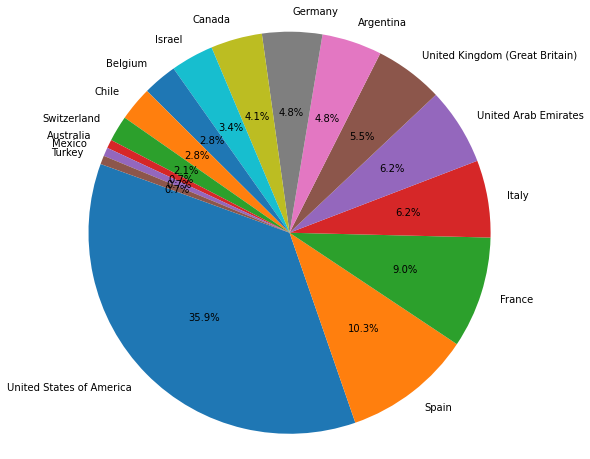

In [268]:
# количество пользователей в тестовой группе по странам

fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(t_country_plot.uid, labels=t_country_plot.country, autopct='%1.1f%%', startangle=160)
plt.axis('equal') 
plt.show()

In [269]:
c_country_plot = users_control.query('total_revenue > 0').groupby('country', as_index=False). \
agg({'uid': 'count'}).sort_values('uid', ascending=False)


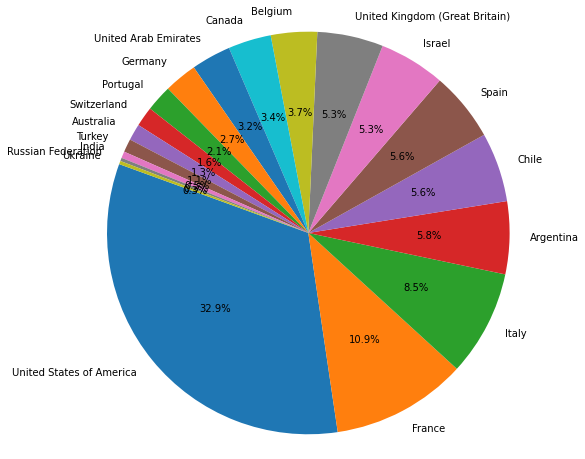

In [270]:
# первый десяток стран в обеих группах похож

fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(c_country_plot.uid, labels=c_country_plot.country, autopct='%1.1f%%', startangle=160)
plt.axis('equal') 
plt.show()

# В обеих группах большая часть пользователей из развитых стран, где как раз и изменлась стоимость. Думаю, можно дальше работать со всеми странами, которые совпадают в группах

In [271]:
# оставлю только пользователей которые совершали транакции в обеих группах

users_control_pay = users_control[users_control['uid'].isin(transactions_control['uid'])]
users_control_1_pay = users_control_1[users_control_1['uid'].isin(transactions_control['uid'])]
users_control_2_pay = users_control_2[users_control_2['uid'].isin(transactions_control['uid'])]
users_test_pay = users_test[users_test['uid'].isin(transactions_test['uid'])]

In [272]:
# проверю, совпадает ли количество в users и transactions

users_control.query('total_revenue > 0').shape[0]

377

In [273]:
users_control_pay.shape[0] 

377

In [274]:
users_test_pay.query('total_revenue > 0').shape[0]

145

In [275]:
users_test_pay.shape[0] 

145

In [276]:
# проверяю выручку по платящим пользователям
users_test_pay.total_revenue.describe()

count       145.000000
mean      16021.110345
std       18218.282855
min         624.000000
25%        8242.000000
50%       12727.000000
75%       16471.000000
max      129870.000000
Name: total_revenue, dtype: float64

In [277]:
users_control_pay.total_revenue.describe()

count      377.000000
mean     10543.137931
std       9629.990757
min        481.000000
25%       6006.000000
50%       9087.000000
75%      12727.000000
max      81796.000000
Name: total_revenue, dtype: float64

In [278]:
# удалим пользователя с нулевой выручкой
users_control_pay.query('total_revenue == 0')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,g,ageGroup


In [279]:
transactions_control = transactions_control.query('uid != 892355163')
users_control_pay = users_control[users_control['uid'].isin(transactions_control['uid'])]

# проверим, значимы ли различия в общей выручке по группам

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


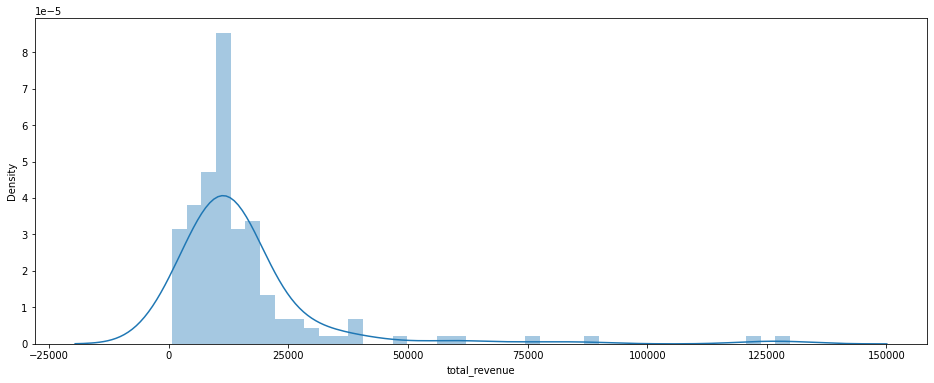

In [280]:
plt.figure(figsize=(16, 6))
sns.distplot(users_test_pay.total_revenue)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


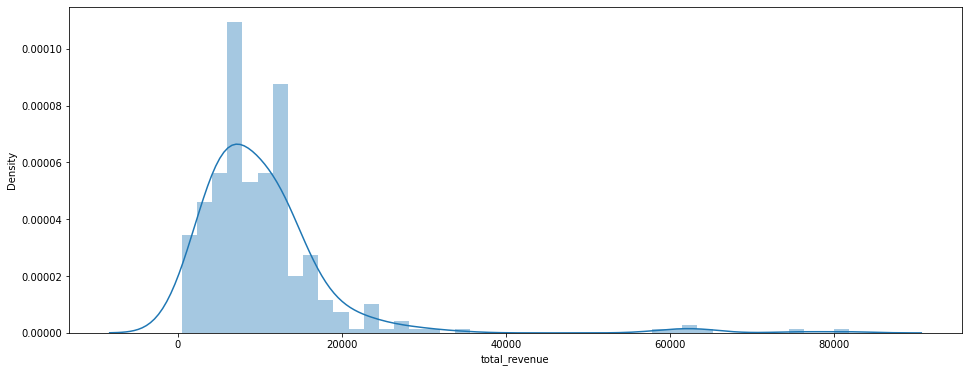

In [281]:
plt.figure(figsize=(16, 6))
sns.distplot(users_control_pay.total_revenue)

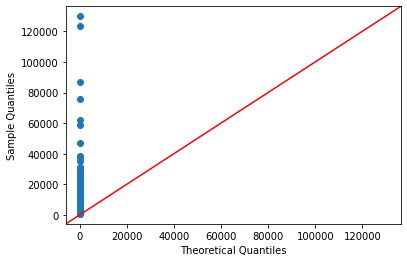

In [282]:

sm.qqplot(users_test_pay.total_revenue, line ='45')
plt.show()

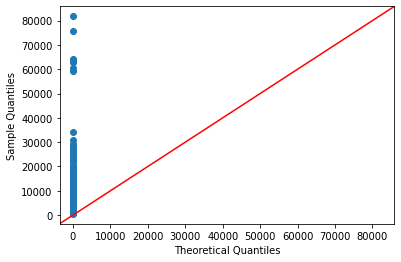

In [283]:

sm.qqplot(users_control_pay.total_revenue, line ='45')
plt.show()

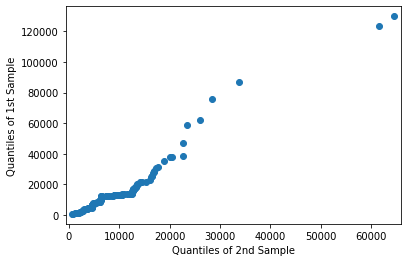

In [284]:
sm.qqplot_2samples(users_test_pay.total_revenue, users_control_pay.total_revenue)
plt.show()

# Распределения ожидаемо ненормальные. проведем аб тест
посчитаем выручку на пользователя, выручку на пользователя с премиумом

In [285]:
# отметим группы
# у тестовой группы arpu упало

users_control['group'] = 'с'
users_test['group'] = 't'

test_1 = pd.concat([users_control, users_test], ignore_index=True)

ab_test = test_1.groupby('group', as_index=False).agg({'total_revenue': 'sum', 'uid': 'count'}).reset_index()
ab_test['arpu'] = ab_test['total_revenue'] / ab_test['uid']
ab_test

,index,group,total_revenue,uid,arpu
0,0,t,2323061.0,4290,541.506061
1,1,с,3974763.0,8578,463.367102


In [286]:
#   критерий Колмогорова-Смирнова показывает, что выборки похожи, если сравнивать всех пользователей

st.ks_2samp(users_test.total_revenue, users_control.total_revenue)


KstestResult(statistic=0.010499401895997839, pvalue=0.9065334387841214)

In [287]:
# дисперсии статзначимо не различаются, можно провести т-тест

levene(users_test.total_revenue, users_control.total_revenue)


LeveneResult(statistic=1.415684250910755, pvalue=0.23413701766245237)

In [288]:
# статзначимых различий между группами нет

stats.ttest_ind(users_test.total_revenue, users_control.total_revenue)

Ttest_indResult(statistic=1.1898253026855476, pvalue=0.23413701766535686)

# тест не показал статзначимые различия в выручке у всех пользователей. проведу тот же тест, только у пользователей, покупавших премиум

In [290]:
# отбираю пользователей с транзакциями premium_no_trial
tr_premium_test = transactions_test.query('product_type == "premium_no_trial"')
tr_premium_control = transactions_control.query('product_type == "premium_no_trial"')



In [291]:
# отбираю пользователей с транзакциями premium_no_trial
users_premium_test = users_test[users_test['uid'].isin(tr_premium_test['uid'])]
users_premium_control = users_control[users_control['uid'].isin(tr_premium_control['uid'])]


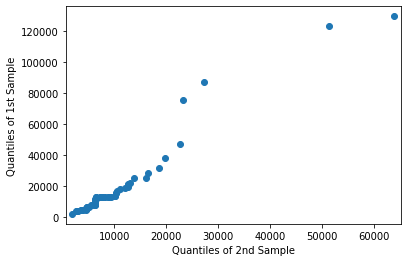

In [292]:
sm.qqplot_2samples(users_premium_test.total_revenue, users_premium_control.total_revenue)
plt.show()

In [293]:
# тут можно заметить, что arppu в тестовой группе выросло, но доля пользователей при почти одинаковых общих выборках меньшн
# значит далее нужно сравнить конверсию

test_2 = pd.concat([users_premium_test, users_premium_control], ignore_index=True)

ab_test_2 = test_2.groupby('group', as_index=False).agg({'total_revenue': 'sum', 'uid': 'count'}).reset_index()
ab_test_2['arppu'] = ab_test_2['total_revenue'] / ab_test_2['uid']
ab_test_2

,index,group,total_revenue,uid,arppu
0,0,t,1181960.0,66,17908.484848
1,1,с,2071706.0,199,10410.582915


In [294]:
#   критерий Колмогорова-Смирнова показывает, что выборки имеют разное распределение

st.ks_2samp(users_premium_test.total_revenue, users_premium_control.total_revenue)


KstestResult(statistic=0.3403380539058931, pvalue=1.2603763704377435e-05)

In [295]:
# дисперсии статзначимо разные, т-тест не подходит

levene(users_premium_test.total_revenue, users_premium_control.total_revenue)

LeveneResult(statistic=7.336714873709814, pvalue=0.007199403871319307)

In [296]:
# проведем бутстрэп тест

In [297]:
bootstrap((users_premium_test.total_revenue,), np.mean )


BootstrapResult(confidence_interval=ConfidenceInterval(low=13430.832983268885, high=26306.68005949922), standard_error=2984.384596141235)

In [298]:
bootstrap((users_premium_control.total_revenue,), np.mean )

BootstrapResult(confidence_interval=ConfidenceInterval(low=9087.373437215945, high=12514.810941592075), standard_error=824.5777962268868)

интервалы вообще не пересекаютя, значит разница статзначима, можно уверенно говорить об увеличении дохода с пользователей с премиумом.  вполне логично, ведь цену повысили в развитых странах, где для людям не так критично переплатить

# проверю долю платящих  пользователей и долю пользователей с премиумом

In [299]:

conv_t = users_test_pay.shape[0] / users_test.shape[0] * 100
conv_c = users_control_pay.shape[0] / users_control.shape[0] * 100

print(conv_t, conv_c)

3.37995337995338 4.383306131965494


In [300]:
conv_pt = users_premium_test.shape[0] / users_test.shape[0] * 100
conv_pc = users_premium_control.shape[0] / users_control.shape[0] * 100

print(conv_pt, conv_pc)

1.5384615384615385 2.319888085800886


доля платящих пользователей и пользователей c премиум подпиской упала в тестовой группе

# посмотрим, зависит ли платежеспособность от возраста


In [301]:
# пользоватей больше всего в молодых группах, средняя выручка больше в тестовой группе
# доля платящих пользователей в тестовой группе значительно упала, особенно в группах до 26 лет и 39-49 лет

age_info_t = users_test_pay.groupby('ageGroup', as_index=False) \
.agg(total_revenue=('total_revenue', 'sum'), mean_revenue=('total_revenue', 'mean'), count=('uid', 'count')) \
.merge(users_test.groupby('ageGroup', as_index=False) \
.agg(all_count=('uid', 'count')))
age_info_t['conv'] = age_info_t['count'] / age_info_t['all_count'] * 100
age_info_t

,ageGroup,total_revenue,mean_revenue,count,all_count,conv
0,17-26,744068.0,18148.000000,41,1408,2.911932
1,27-38,1033630.0,14558.169014,71,1768,4.015837
2,39-49,412698.0,17943.391304,23,779,2.952503
3,50-99,85423.0,9491.444444,9,246,3.658537


In [302]:
age_info_c = users_control_pay.groupby('ageGroup', as_index=False) \
.agg(total_revenue=('total_revenue', 'sum'), mean_revenue=('total_revenue', 'mean'), count=('uid', 'count')) \
.merge(users_control.groupby('ageGroup', as_index=False) \
.agg(all_count=('uid', 'count')))
age_info_c['conv'] = age_info_c['count'] / age_info_c['all_count'] * 100
age_info_c

,ageGroup,total_revenue,mean_revenue,count,all_count,conv
0,17-26,1322152.0,9866.805970,134,2821,4.750089
1,27-38,1608906.0,10655.006623,151,3478,4.341576
2,39-49,767078.0,11448.925373,67,1569,4.270236
3,50-99,196209.0,10900.500000,18,532,3.383459


In [303]:
# применим z-тест для разности долей на первые две возрастные группы

successes = [41+71, 134+151]
nobs = [1408+1768, 2821+3478]
stat, pval = proportions_ztest(successes, nobs)
print('Z-статистика = {0:0.3f}'.format(stat))
print('P-значение = {0:0.3f}'.format(pval))

Z-статистика = -2.289
P-значение = 0.022


In [304]:
#  и на возрастные группы
successes = [23+9, 67+18]
nobs = [779+246, 1569+532]
stat, pval = proportions_ztest(successes, nobs)
print('Z-статистика = {0:0.3f}'.format(stat))
print('P-значение = {0:0.3f}'.format(pval))

Z-статистика = -1.277
P-значение = 0.201


# тест показывает статзначимые различия в группах до 38 лет, в группе 39-99 лет различия не статзначимы

 попробуем разобраться со средним значением транзакции по странам

In [305]:
# создаю таблицы со средней медианой, отбираю страны, где больше трех пользователей в каждой группе

mean_check_t = transactions_test.groupby('country', as_index=False) \
.agg(mean_tr=('revenue', 'mean'), users=('uid','count'))
mean_check_t =  mean_check_t.query('users > 3')
mean_check_t

,country,mean_tr,users
0,Argentina,18801.900000,10
2,Belgium,10447.666667,6
3,Canada,5769.636364,11
4,Chile,5828.333333,12
5,France,8755.882353,34
6,Germany,12012.000000,8
7,Israel,6682.000000,14
8,Italy,5671.250000,20
9,Latvia,2291.250000,4
11,Spain,11417.120000,25


In [306]:
mean_check_c = transactions_control.groupby('country', as_index=False) \
.agg(mean_tr=('revenue', 'mean'), users=('uid','count'))

mean_check_c =  mean_check_c.query('users > 3')
mean_check_c = mean_check_c[mean_check_c['country'].isin(mean_check_t['country'])]
mean_check_t = mean_check_t[mean_check_t['country'].isin(mean_check_c['country'])]
mean_check_c

,country,mean_tr,users
0,Argentina,5876.577778,45
3,Belgium,8658.000000,18
4,Canada,6129.500000,20
5,Chile,6064.117647,34
6,France,5515.033333,60
7,Germany,6814.785714,14
9,Israel,4556.825000,40
10,Italy,3819.045455,66
14,Spain,7508.666667,39
15,Switzerland,6833.125000,8


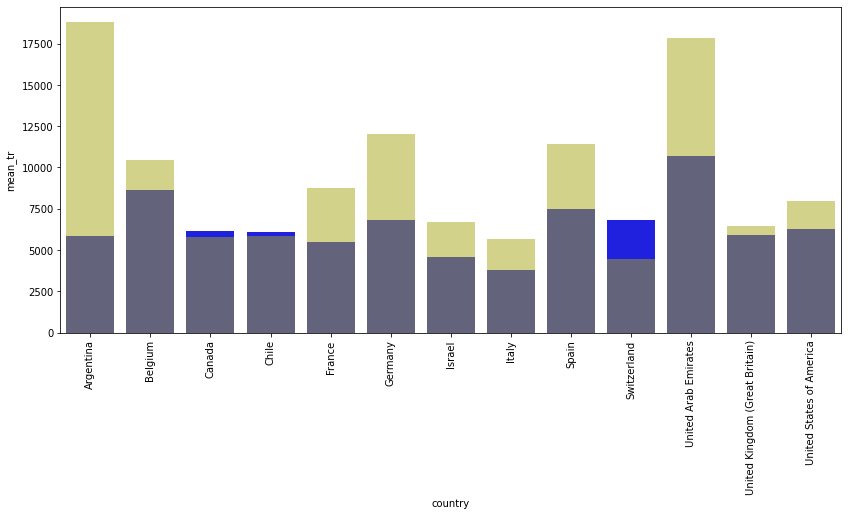

In [307]:
# медиана ценника по странам. желтый - тестовая группа, синий контрольная
# в тестовой группе медиана заметно больше

plt.figure(figsize = (14, 6))
plt.xticks(rotation = 90)

sns.barplot(x = mean_check_c.country, y = mean_check_c.mean_tr, color ='b')
sns.barplot(x = mean_check_t.country, y = mean_check_t.mean_tr, color = 'y', alpha=0.5)




# средняя транзакция выросла в тестовой группе везде кроме Канады, Чили, Швейцарии

# Выводы: в тестовой группе улучшились показатели arppu. Пользователи ожидаемо стали больше тратить, ведь цену повысили в развитых странах с высоким уровнем дохода. Также увеличилась медиана чека, это логично выходит из условия задачи. Стоит обратить внимание, что конверсия в покупку premium_no_trial заметно уменьшилась, как и доля платных молодых платных пользователей. ARPU значимо не вырос. Если приложение еще не укрепилось на рынке, то не стоит торопиться поднимать стоимость подписки. Если главная цель - поднять доход, то изменения можно применять.